In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('/Users/kirill/Downloads/stud_math.csv')

def get_stat_dif(column):
    cols = df[column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (4, 4))
    sns.boxplot(x=column, y='score', 
                data=df)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [3]:
# разделяем столбцы на две группы
nominative_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason' 
                , 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities'
                , 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

numerical_col = ['age', 'absences', 'score']

In [4]:
'''проверяем номинативные переменные на наличие некорректных значений, находим такие в колонках
Fedu и famrel'''
for column in nominative_col:
    print(column, df[column].unique())

# Заполняем ячейки с некорректными значениями пустыми значениями
df.loc[df.Fedu==40, 'Fedu'] = None
df.loc[df.famrel==-1, 'famrel'] = None

school ['GP' 'MS']
sex ['F' 'M']
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]


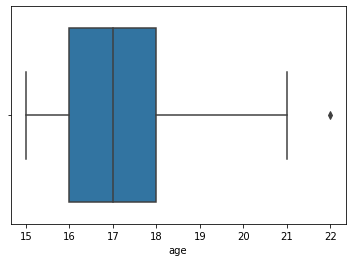

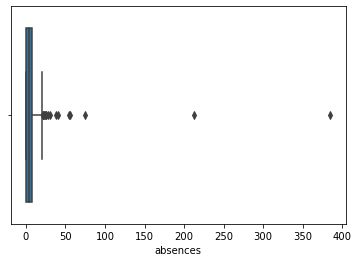

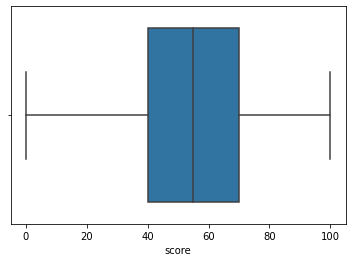

In [5]:
'''Смотрим на распределение количественных переменных: видим значительные выбросы в колонке 
absences'''
for col in numerical_col:
    sns.boxplot(x=df[col])
    plt.show()

In [6]:
'''Теперь посмотрим на выбросы с помощью формулы интерквартильного расстояния. Далее заполним None 
значениями все ячейки с выбросами, хотя возможно можно было убрать только ,например, двух самых
запустивших занятия учеников, но данных достаточно много, так что убрать 17 выбросов не критично, как я
думаю'''
for col in numerical_col:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)

    print('Выбросы в колонке', col)
    print(df[col].loc[df[col].gt(perc75+1.5*IQR)])
    print(df[col].loc[df[col].lt(perc25-1.5*IQR)], '\n')
    
    df[col].loc[df[col].gt(perc75+1.5*IQR)] = None
    df[col].loc[df[col].lt(perc25-1.5*IQR)] = None

Выбросы в колонке age
247    22
Name: age, dtype: int64
Series([], Name: age, dtype: int64) 

Выбросы в колонке absences
40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64
Series([], Name: absences, dtype: float64) 

Выбросы в колонке score
Series([], Name: score, dtype: float64)
Series([], Name: score, dtype: float64) 



/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

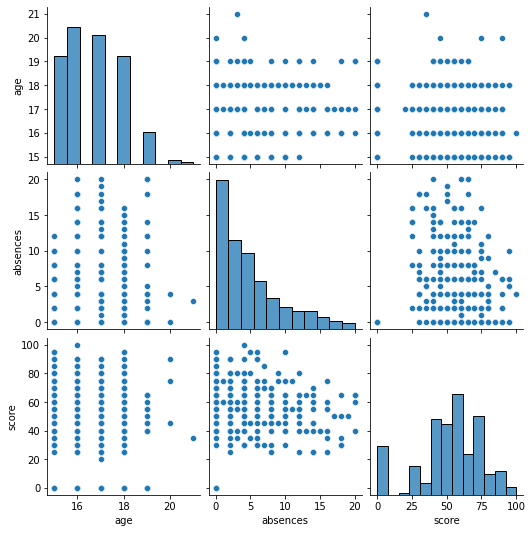

In [7]:
# построим графики зависимости количественных переменных, корреляции не видим
sns.pairplot(df[numerical_col])

In [8]:
# Построим матрицу корреляций. Сильной корреляции не обнаружено
df[numerical_col].corr()

,age,absences,score
age,1.000000,0.129016,-0.153518
absences,0.129016,1.000000,0.081274
score,-0.153518,0.081274,1.000000


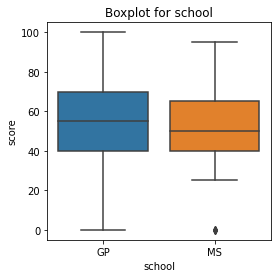

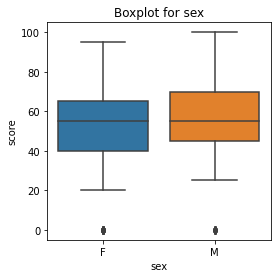

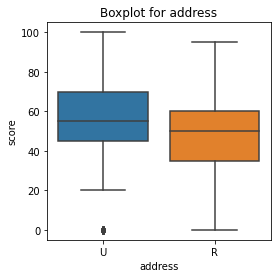

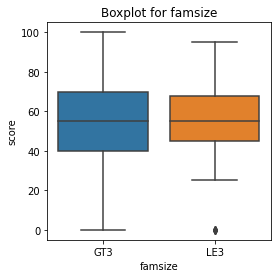

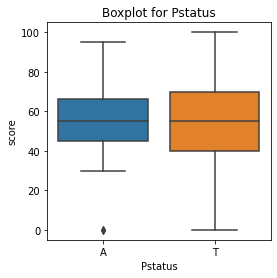

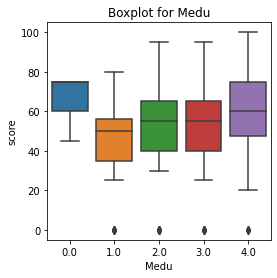

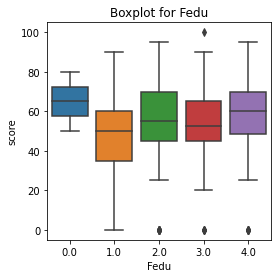

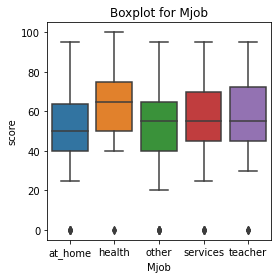

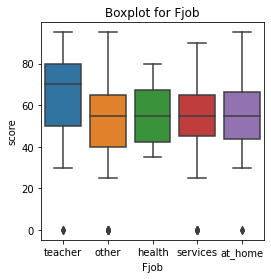

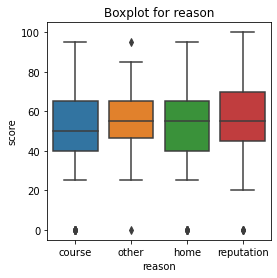

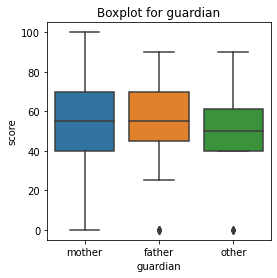

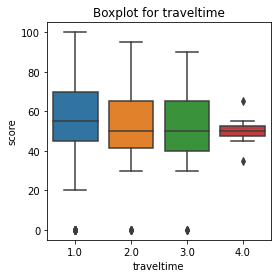

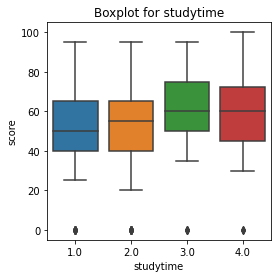

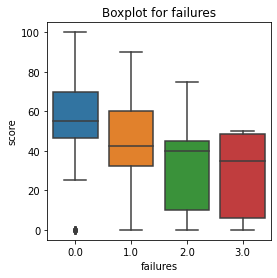

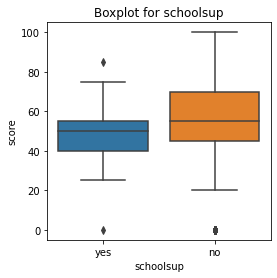

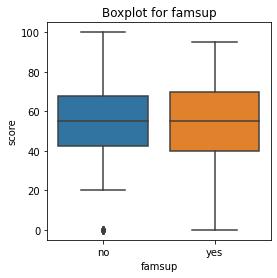

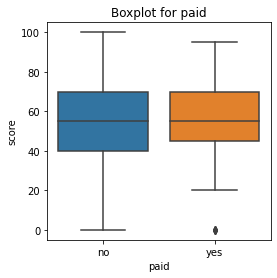

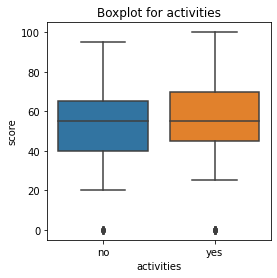

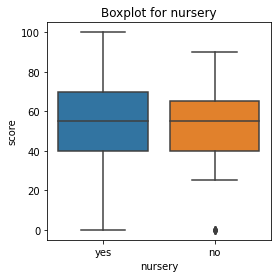

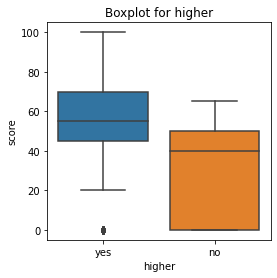

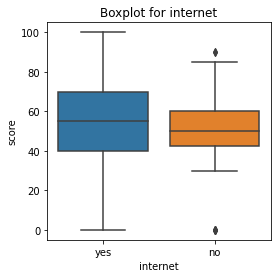

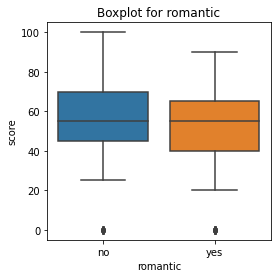

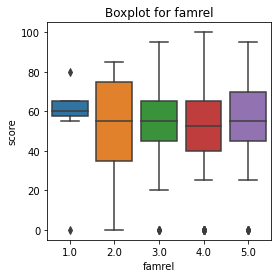

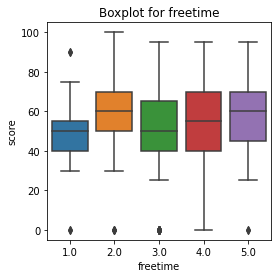

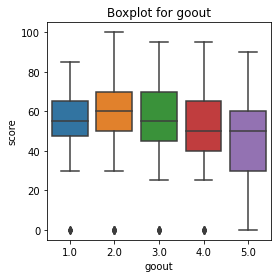

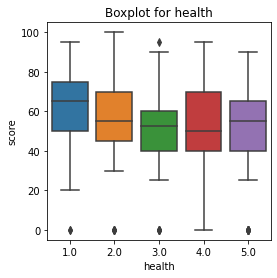

'Визульно оценив графики можно выделить следующие столбцы, которые оказывают влияние на score:\naddress, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, higher, famrel, freetime, goout, health.'

In [9]:
'''С помощью boxplot посмотрим, какие номинативные переменные могут оказывать влияние
на значение score'''

for col in nominative_col:
    get_boxplot(col)

'''Визульно оценив графики можно выделить следующие столбцы, которые оказывают влияние на score:
address, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, higher, famrel, freetime, goout, health.'''

In [10]:
'''Зная, что визульный осмотр может нас подвести, проведем парный t-test для каждой пары значений в каждом
столбце с целью найти статистически значимые различия.''' 
for col in nominative_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [11]:
'''А теперь я в тупике потому что ttest дал неожиданные результаты. Почему Medu показал значимые отличия а Fedu
 - нет, хотя по графикам видно что там чуть ли не сильнее категории отличаются друг от друга? А так же не понятно
 , почему у romantic есть отличия. По графику их нет абсолютно.'''

'А теперь я в тупике потому что ttest дал неожиданные результаты. Почему Medu показал значимые отличия а Fedu\n - нет, хотя по графикам видно что там чуть ли не сильнее категории отличаются друг от друга? А так же не понятно\n , почему у romantic есть отличия. По графику их нет абсолютно.'

In [12]:
'''Для более четкого понимания, какие столбцы оставлять для модели, попробуем также построить тепловую матрицу
корреляции для ранговых переменных и score'''

rank_set = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
               'score']]

'Сильной корреляции со score не обнаруживаем'

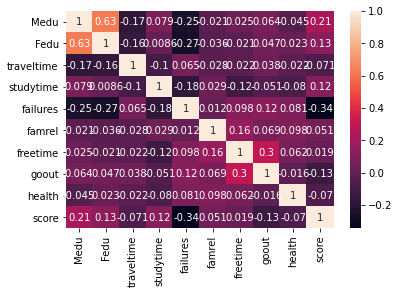

In [13]:
m = sns.heatmap(rank_set.corr(), annot = True)

'''Сильной корреляции со score не обнаруживаем'''

In [ ]:
'''По итогу работы я бы оставил результат работы теста Стьюдента - колонки: Medu, failures, higher, romantic
а также все три количественные колонки: age, absences и score.
Однако, такой результат меня довольно сильно смущает, т.к. осталось совсем мало колонок.'''